## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID. Add lines as needed for your group size, and make sure each ID is listed on a separate line. 

**Yuanhao Zhu** A13626824

**Jinwei Ren** A92061199

**Yijie Fan** A13485989

**Bolin Yang** A92111272

**Mu He** A13361247

**Xuan Zhang** A14173638

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import patsy
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import ttest_ind, chisquare, normaltest

/Users/hemu/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Preprocess the data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample = pd.read_csv('sample_submission.csv')

In [3]:
df_sample['SalePrice'] = df_sample['SalePrice'].round(0).astype(int)
df_test['SalePrice'] = df_sample['SalePrice']
df = df_train.append(df_test)
df = df.set_index('Id')

Data cleaning: For this part, we don't need the columns such as Lot, Root, Basement, etc. So we drop these columns.  

In [4]:
df = df.drop(['MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley', 'LotShape','LandContour','Utilities','LotConfig','LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl','Exterior1st','Exterior2nd','MasVnrType', 'MasVnrArea', 'RoofStyle'], axis = 1 )

Now we create a new column called PricePerSquare which denotes the price per area. 

In [10]:
df['PricePerSquare'] = df['SalePrice']/df['GrLivArea']

## Part 1 Analysis based on housing quality and price

Our goal here is to analyze whether housing quality has a strong correlation to housing prices. To do so, we use linear regression to plot a graph with housing quality and housing prices.

In [16]:
df_QP = pd.DataFrame()
df_QP['price'] = df['PricePerSquare']
df_QP['quality'] = df['OverallQual'] 
outcome, predictors = patsy.dmatrices('price~quality', df_QP)
mod = sm.OLS(outcome, predictors)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           4.97e-13
Time:                        10:48:06   Log-Likelihood:                -14480.
No. Observations:                2919   AIC:                         2.896e+04
Df Residuals:                    2917   BIC:                         2.898e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    145.9313      2.835     51.483      0.0

By the R-squared and p- value shown above, we can conclude that the relationship between quality and price is strong, let's plot the data so that we can visualize data.

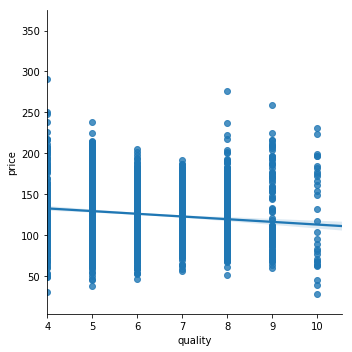

In [19]:
fig=sns.lmplot(x='quality', y='price',data=df_QP,fit_reg=True) 
fig.set(xlim=(4, None))
fig.set(ylim=(4,None))
plt.show()

## Part 2 Analysis based on housing style and price

Our goal here is to analyze which housing style predicts a higher price. To do so, we use logisitic regression to classify and plot a graph with housing style and housing prices.